In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
import statsmodels.api as sm

In [3]:
datafile = '../../dataset/ch04/coasters_2015.txt'
coasters = pd.read_csv(datafile, sep='\t')

In [4]:
coasters.head()

,Name,Park,Track,Speed,Height,Drop,Length,Duration,Inversions
0,Top Thrill Dragster,Cedar Point,Steel,120.0,420.0,400.0,2800.0,NaN,0
1,Superman The Escap,Six Flags Magic Mountain,Steel,100.0,415.0,328.1,1235.0,NaN,0
2,Millennium Force,Cedar Point,Steel,93.0,310.0,300.0,6595.0,165.0,0
3,Goliath,Six Flags Magic Mountain,Steel,85.0,235.0,255.0,4500.0,180.0,0
4,Titan,Six Flags Over Texas,Steel,85.0,245.0,255.0,5312.0,210.0,0


In [5]:
coasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        241 non-null    object 
 1   Park        241 non-null    object 
 2   Track       241 non-null    object 
 3   Speed       241 non-null    float64
 4   Height      241 non-null    float64
 5   Drop        118 non-null    float64
 6   Length      241 non-null    float64
 7   Duration    157 non-null    float64
 8   Inversions  241 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 17.1+ KB


In [6]:
coasters = coasters[~coasters.Drop.isna()]  ## need to drop the NA values by boolean indexing

In [7]:
coasters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 237
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        118 non-null    object 
 1   Park        118 non-null    object 
 2   Track       118 non-null    object 
 3   Speed       118 non-null    float64
 4   Height      118 non-null    float64
 5   Drop        118 non-null    float64
 6   Length      118 non-null    float64
 7   Duration    91 non-null     float64
 8   Inversions  118 non-null    int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 9.2+ KB


* Problem 23

(25.0, 425.0, 0.0, 160.0)

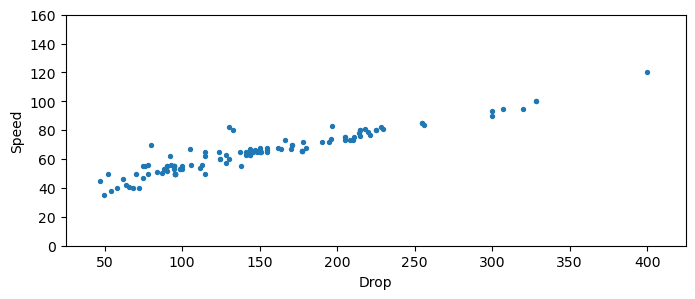

In [8]:
plt.figure(figsize=(8,3))
plt.scatter(coasters.Drop, coasters.Speed,
           s=8, marker='o');
plt.xlabel('Drop')
plt.ylabel('Speed')
plt.axis([25, 425, 0, 160])

* Problem 23(a)
Does the scatterplot indicate that it is appropriate to calculate the correlation?


Answer: Yes, the scatterplot does indicate that it is appropriate to calculate the correlation.  The pattern in the scatterplot is linear, with a clear positive and strong association between the Drop and Speed.

Need to check **form** and **strength** before making a conclusion on the **direction**.

**Form** assesses linearity versus nonlinearity.  Judging by the scatterplot, we see that the linear trend accounts for the majority of the association.

**Strength** measures how scattered the data points are from the linear trend.  We see that the points are very close to the linear backbone, so the trend is very strong.  In other words, the linear singnal suggested by the association with Drop explains most of the variations in the Speed.  Measurement noise is small compared to the signal.

**Direction**  Based on above observation (assessment), we can say that there is a positive correlation between Drop and Speed, and therefore it is appropriate to calculate the correction.

(25.0, 425.0, 0.0, 160.0)

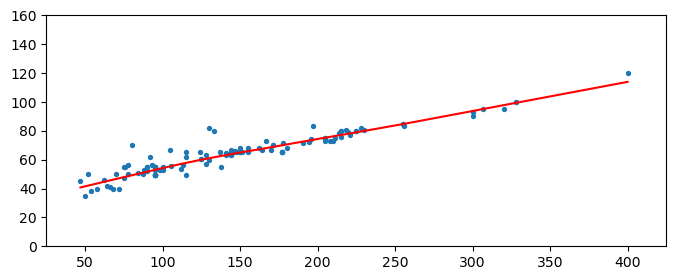

In [9]:
plt.figure(figsize=(8,3))
plt.scatter(coasters.Drop, coasters.Speed,
           s=8, marker='o');
smoothed_speed = sm.nonparametric.lowess(exog=coasters.Drop, endog=coasters.Speed)
plt.plot(smoothed_speed[:, 0], smoothed_speed[:, 1], 'r');
plt.axis([25, 425, 0, 160])

In [11]:
round(np.corrcoef(coasters.Speed, coasters.Drop)[1, 0], 3)

0.944

* Problem 23(b)


The correlation of Speed and Drop is 0.944.  Describe the association.


Answer: The correlation of 0.944 measures a positive and strong correlation between the coaster's speed and its drop.

* Problem 47

In [12]:
coasters = pd.read_csv(datafile, sep='\t')
ride_length = coasters.Length

In [14]:
nsample = 1_000
sample_size = 60
sample_mean = np.zeros(nsample)
sample_median = np.zeros(nsample)
for i in range(nsample):
    sample = ride_length.sample(sample_size)
    sample_mean[i] = np.mean(sample)
    sample_median[i] = np.median(sample)

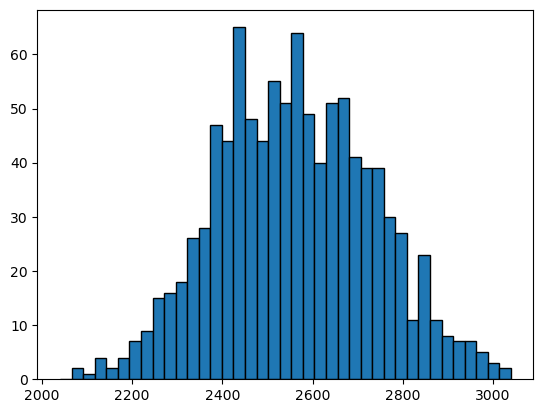

In [18]:
# plot historam
plt.hist(sample_mean, bins=np.linspace(2040, 3040, 40), edgecolor='black');

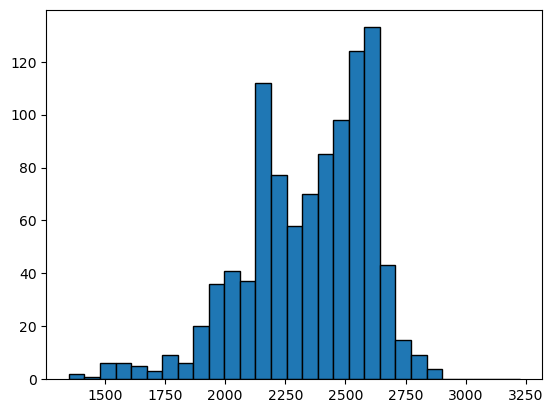

In [17]:
plt.hist(sample_median, bins=np.linspace(1350, 3225, 30), edgecolor='black');

* Problem 47

I would use the 68-95-99.7 Rule for the distribution of means, because the distribution of means is unimodal, symmetric, and free of outliers, and so the 68-95-99.7 Rule should be applicable to this distribution.

More importantly, the 68-95-99.7 Rule assumes a Gaussian (Normal) distribution.  Although the original distribution of the 241 ride lengths is not Gaussian, once we take samples repetitively and pool sample means together, the sample means obey an approximately Gaussian distribution pursuant to the Central Limit Theorem.  As a result, the 68-95-99.7 Rule applies to the histogram of the sample means.

There is no such a parallel theorem for the sample medians as the CLT.  In practice, we see from the second histogram that the distribution of the sample medians does not resemble a Normal distribution.